### Import libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import feather
from os import listdir
from os.path import join, isfile
sns.set(style="whitegrid")
pd.options.mode.chained_assignment = None 

--------------------------------------

### Load correlation matrices

In [2]:
fileList = ['corrMats/' + f for f in listdir('corrMats/') if isfile(join('corrMats/', f))]
fileList

['corrMats/corrMat0.feather',
 'corrMats/corrMat1.feather',
 'corrMats/corrMat2.feather',
 'corrMats/corrMat3.feather',
 'corrMats/corrMat4.feather',
 'corrMats/corrMat5.feather',
 'corrMats/corrMat6.feather',
 'corrMats/corrMat7.feather',
 'corrMats/corrMat8.feather',
 'corrMats/corrMat9.feather']

--------------------------------------

### Compute the max-abs-mean correlation

Functions used to compute the correlation between two methods, calculating 2 ways:
1. method1 as test, method2 as benchmark
2. method2 as test, method1 as benchmark

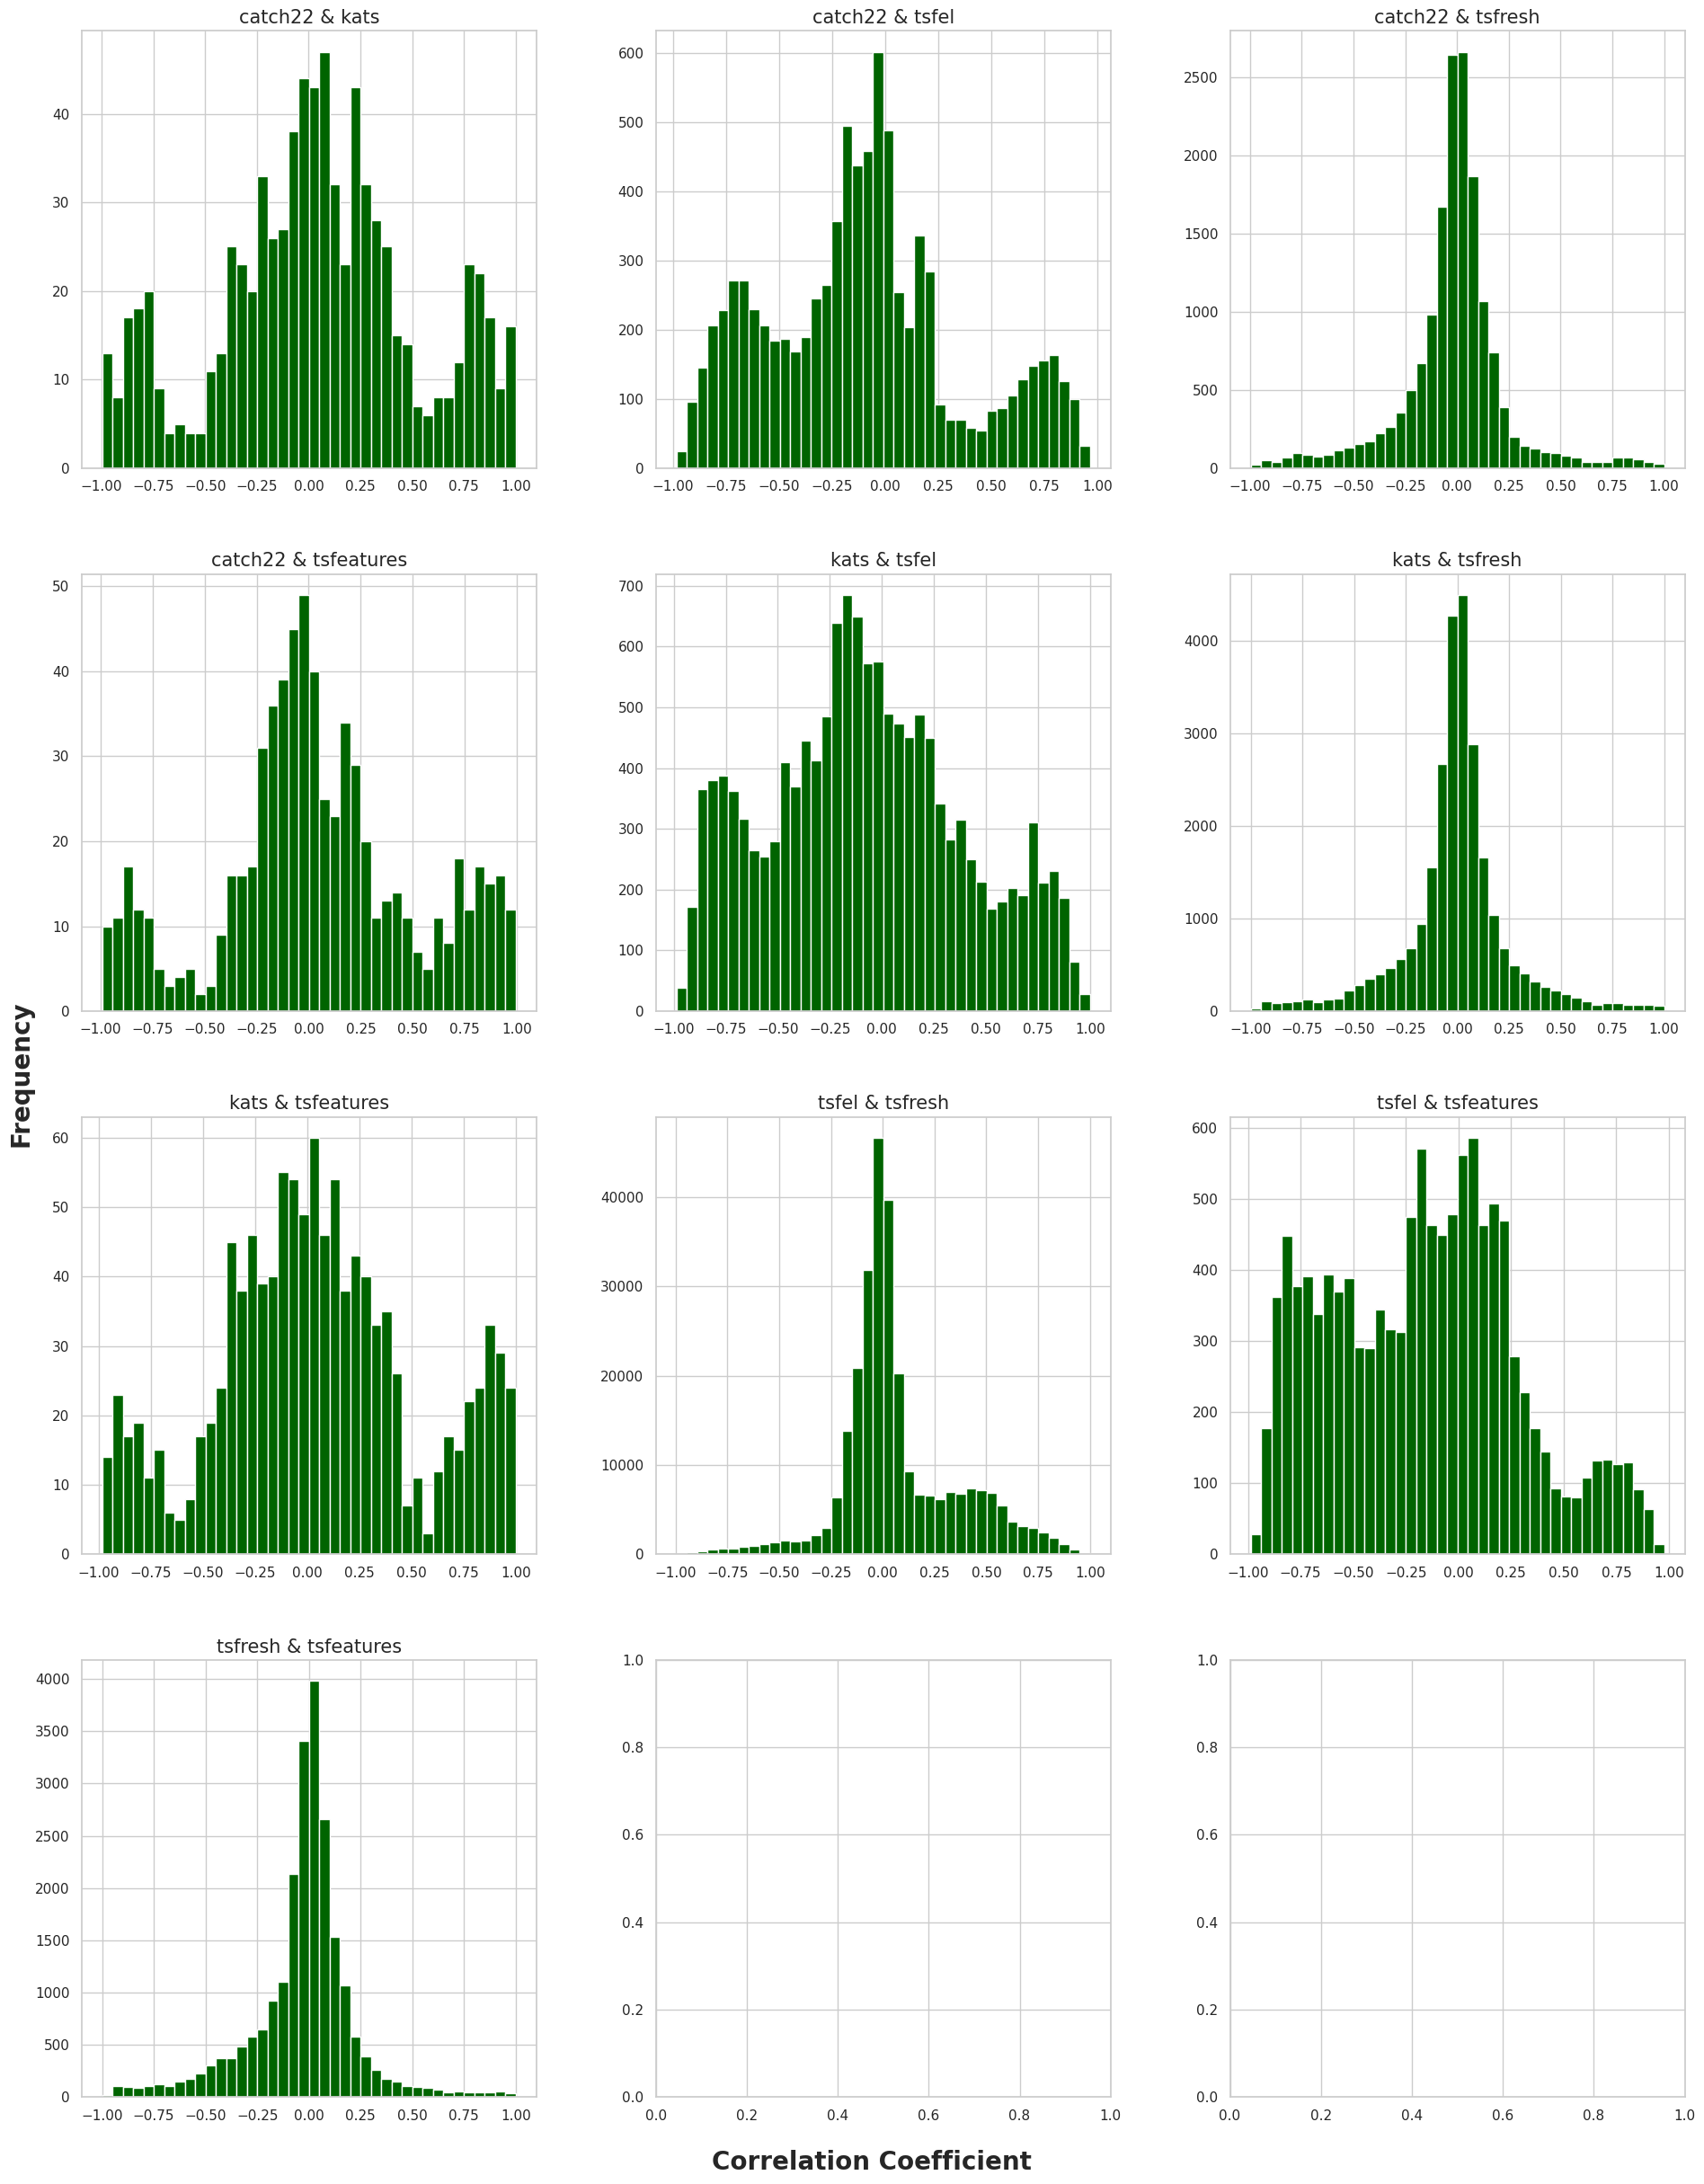

In [4]:
fig, ax = plt.subplots(int(np.ceil(len(fileList)/3)), 3, figsize=(20, 25))

# using padding
fig.tight_layout(pad=5.0)

n = 3

axes = ax.flatten()
for file, a in zip(fileList, axes):
    
    df = feather.read_dataframe(file)
    a.hist(df['corr'], bins=40, color='darkgreen')
    #a.set_title("Distribution of feature correlations between " + df['method1'].unique()[0] + " and " +  df['method2'].unique()[0])
    a.set_title(df['method1'].unique()[0] + " & " +  df['method2'].unique()[0])
    a.title.set_size(15)

fs = 20
fig.supxlabel('Correlation Coefficient', fontsize=fs, weight='bold')
fig.supylabel('Frequency', fontsize=fs, weight='bold')
fig.savefig('outputs/corrDistributions.pdf')